# Exploratory Data Analysis
It is a set of processes used to filter the data from redundancies such as missing values, outliers etc. It also helps us to understand the relationship between variables and gives us a wider perspective to build on it.

The following are the steps in EDA:

* **Understand the Data:** Comprehend the structure of the data.
* **Clean the Data:** Remove outliers and fill the missing values.
* **Analyse the reationship between variables:**

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap 
from sklearn import metrics

In [68]:
data = pd.read_csv('./Data/ifood_df.csv')

## Understanding the Data

In [69]:
data.shape

(2205, 39)

### Features and Description

This dataset contains 39 features and details of 2205 customers

| Features  | Description  |
|---|---|
| Income | Customer's yearly household income. |
| Kidhome | No. of small children in home. |
| Teenhome | No. of teens in home. |
| Recency | No. of days since last purchase. |
| MntWines | Amount spent on Wines in the last two years. |
| MntFruits | Amount spent on Fruits in the last two years. |
| MntMeatProducts | Amount spent on Meat Products in the last two years. |
| MntFishProducts | Amount spent on Fish in the last two years.  |
| MntSweetProducts | Amount spent on Sweet Products in the last two years.  |
| MntGoldProds | Amount spent on Gold Class Products in the last two years.  |
| NumDealsPurchases | No. of purchases made with discount. |
| NumWebPurchases | No. of purchases made through Company's website. |
| NumCatalogPurchases | No. of purchases made using Catalogue.  |
| NumStorePurchases | No. of purchases made directly through store.  |
| NumWebVisitsMonth | No. of visits to the company website. |
| AcceptedCmp3 | 1 if customer accepted the offer in Third Campaign, 0 otherwise  |
| AcceptedCmp4 | 1 if customer accepted the offer in Fourth Campaign, 0 otherwise  |
| AcceptedCmp5 | 1 if customer accepted the offer in Fifth Campaign, 0 otherwise  |
| AcceptedCmp1 | 1 if customer accepted the offer in First Campaign, 0 otherwise |
| AcceptedCmp2 | 1 if customer accepted the offer in Second Campaign, 0 otherwise  |
| Complain | 1 if Customer complained in the last two years. |
| Z_CostContact | Not defined by the Dataset.  |
| Z_Revenue | Not defined by the Dataset. |
| Response | 1 if customer accepted the offer in the last Campaign, 0 otherwise  |
| Age | Age of Customer. |
| Customer_Days | No. of Days since Customer. |
| marital_Divorced | 1 if Customer is divorced, 0 otherwise. |
| marital_Married | 1 if Customer is Married, 0 otherwise.  |
| marital_Single | 1 if Customer is Single, 0 otherwise.  |
| marital_Together | 1 if Customer is Living Together, 0 otherwise. |
| marital_Widow | 1 if Customer is Widowed, 0 otherwise.  |
| education_2n Cycle | 1 if Customer has highest qualification till 2n Cycle.  |
| education_Basic | 1 if Customer has highest qualification till High School.   |
| education_Graduation | 1 if Customer has highest qualification till Graduation.  |
| education_Master | 1 if Customer has highest qualification till Masters.  |
| education_PhD | 1 if Customer has highest qualification till PhD. |
| MntTotal | Total Amount spent in the last two years. |
| MntRegularProds | Amount spent on Regular class Products in the last two years. |
| AcceptedCmpOverall | Total number of Campaigns accepted by the Customer  |

### Which Features to Drop?

* `Z_CostContact` and `Z_Revenue` are not defined by the Dataset and hence, sadly, we have to drop them. :(
* Since we have no idea when the campaigns were organized and our analysis is mostly relative than absolute hence, no of days since last purchase does not play an important role in current analysis. Thus, we can drop `Recency`. 

In [70]:
if 'Z_CostContact' in data.columns:
    data.drop(columns =['Z_CostContact', 'Z_Revenue', 'Recency'], axis =1, inplace=True)

### Determining Outliers

Determination of Outlier comes before Missing value since, the outliers can negetively influence the value during Missing Value Imputation. Outliers mean they are below or above 3 standard deviations from the mean. An effective tool to visualize outliers is Box Plot.

**Box Plot:**

![title](https://www.isixsigma.com/wp-content/uploads/2018/11/basic_box_plot-400x190.png)

The Line in the middle of the Box plot shows the median. The median is important as it is not affected by the outliers. 50% of the Data lies above the Median and the other 50% lies below it. The lower Quartile represents 25% of the Data below median and the Upper Quartile represents 25% of the data above median. The lines or whiskers at the end shows exhibits the rest of the data.

![title](https://www.itl.nist.gov/div898/handbook/eda/gif/boxplot0.gif)

The Outliers are represented in the form of dots beyond the box plot. However, not all outliers are bad and hence, care must be taken.

<AxesSubplot:>

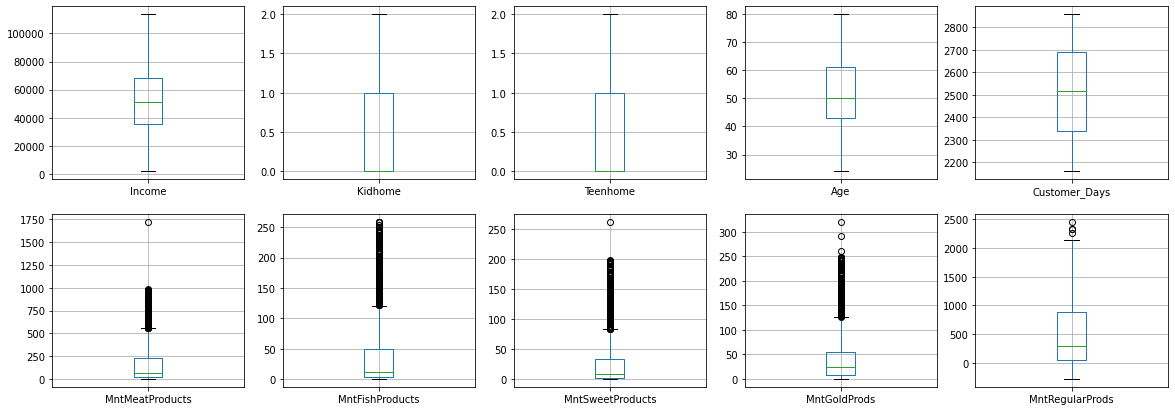

In [71]:
plt.figure(figsize = (20,7))
plt.subplot(2,5,1)
data.boxplot(column = 'Income')
plt.subplot(2,5,2)
data.boxplot(column = 'Kidhome')
plt.subplot(2,5,3)
data.boxplot(column = 'Teenhome')
plt.subplot(2,5,4)
data.boxplot(column = 'Age')
plt.subplot(2,5,5)
data.boxplot(column = 'Customer_Days')
plt.subplot(2,5,6)
data.boxplot(column = 'MntMeatProducts')
plt.subplot(2,5,7)
data.boxplot(column = 'MntFishProducts')
plt.subplot(2,5,8)
data.boxplot(column = 'MntSweetProducts')
plt.subplot(2,5,9)
data.boxplot(column = 'MntGoldProds')
plt.subplot(2,5,10)
data.boxplot(column = 'MntRegularProds')

The outliers found in `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` and `MntRegularProds` are within rational range. Hence, there is no point in removing them. Other columns do not have any significant outliers. Thus, the data is surprisingly quite clean. 

### Missing Value Imputation

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute or estimate the missing values such that it does not interfere with the statistics of our dataset. The following are some of the techniques to impute missing value.

* **Imputation using Mean, Median:** This works by calculating the `Mean`/`Median` of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric non-categorical data. BoxPlot can assist to decide between `Mean` and `Median`. If the data is skewed and there are outliers than mean would give an erroneous measure of central tendency, interfering with the overall distribution of the data. Thus, `mean` should be used only when the data is symmetrically distributed otherwise `Median` gives better result. However, this procedure does not account for correlation between features or probability of uncertainity in determination of the feature.
* **Imputation using Mode:** Imputation is `Mode` wourks best for categorical data. However, it may disturb the distribution of the data.
* **Imputation using Constant:** This technique is almost never a good idea. It drastically effects all the parameters of the distribution.
* **Imputation Using k-NN:** The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses `feature similarity` to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. It works by creating a basic mean impute then using the resulting complete list to construct a KDTree. Then, it uses the resulting KDTree to compute nearest neighbours (NN). After it finds the k-NNs, it takes the weighted average of them. It can be much more accurate than the mean, median or mode however, it is computationally very expensive because kNN works by storing the whole training dataset in the Memory. Moreover, it is quite sensitive to outliers.
* **Imputation Using Multivariate Imputation by Chained Equation (MICE):** This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. Library: `from impyute.imputation.cs import mice`.
* **Imputation Using Deep Learning:** This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. Library: `import datawig`
* **Stochastic regression imputation:** It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset plus some random residual value.
* **Extrapolation and Interpolation:** It tries to estimate values from other observations within the range of a discrete set of known data points.
* **Hot Deck Imputation:** Works by randomly choosing the missing value from a set of related and similar variables.


In [74]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

Apparently, there are no missing values here. :(

The columns in the dataset are haphazard and hence we can order it in different segments as per basics of Marketing Analytics for simplier understanding. 

| Segment  | Meaning  |Columns  |
|---|---|---|
| Demographic | Classification based on individual attributes| Income, Age, Kidhome, Teenhome, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD |
| Firmographic | Classification based on company or organisation attributes| AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, AcceptedCmpOverall, Complain |
| Behavioural | Classification based on behaviours like product usage, technology laggards, etc.| MntWines, MntSweetProducts, MntFruits, MntMeatProducts, MntFishProducts, MntGoldProds, MntRegularProds, MntTotal, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Customer_Days |

In [75]:
data = data[['Income', 'Age', 'Kidhome', 'Teenhome',  'marital_Single', 'marital_Divorced', 'marital_Widow', 'marital_Together', 'marital_Married',  
'education_Basic', 'education_Graduation', 'education_Master', 'education_2n Cycle', 'education_PhD', 'Complain', 'AcceptedCmp1',
 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response', 'AcceptedCmpOverall', 'MntWines', 'MntSweetProducts', 'MntFruits', 
 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntRegularProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 
 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days' ]] 

In [76]:
data.to_csv('./Data/cleaned-data.csv', index = False)
del data

### Patterns

In [77]:
df = pd.read_csv('./Data/cleaned-data.csv')

In [78]:
correlation = df.corr()

#### Demographic Vs Behavioural relationship

Text(0.5, 1.0, 'Demographic Vs Behavioural relationship')

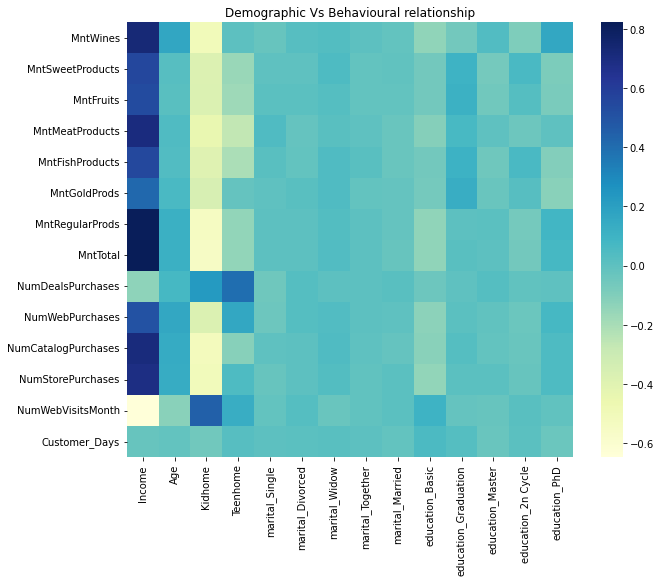

In [79]:
startx = correlation.columns.get_loc('Income')
endx = correlation.columns.get_loc('education_PhD') +1

starty = correlation.columns.get_loc('MntWines')
endy = correlation.columns.get_loc('Customer_Days') + 1

plt.figure(figsize=(10,8))
sns.heatmap(correlation.iloc[starty:endy, startx:endx], cmap="YlGnBu")
plt.title('Demographic Vs Behavioural relationship')

##### Inferences

1. Customers with higher income:
   1. Does not visit the Company Website often.
   2. Prefers stores and catalogues than buying online.
   3. Spends more on Regular Products than Gold class Products.
   4. Are not very interested with Deals.
   5. Has substantial expenditure on Wines.
2. Customers from higher age group:
   1. Visits the Website less often.
   2. Likes to spend on Wines.
3. Customers with Kid at home:
   1. Has highest Website Visiting rates.
   2. Has very low purchases but quite interested on Deals.
4. Customers with Teen at home:
   1. Website visit reduces as Kids turn to Teens.
   2. Prefers mostly online purchase using Deals.
5. Customers with Basic Education:
   1. Vists the Website moderately but has lower purchases.
   2. Has a higher knack towards Gold products than Regulars.
6. Customers with Graduation:
   1. Spends more on Gold Products than Regular varieties.
   2. Has a higher liking towars Wine.

**Notes:** The `Customer_Days` is quite uniformly distributed between the demographics of the Segment. This can be seen as a good distribution of the Memberships without prioritizing any single sector.  


Demographic vs Firmographic Relation

Text(0.5, 1.0, 'Demographic vs Firmographic Relation')

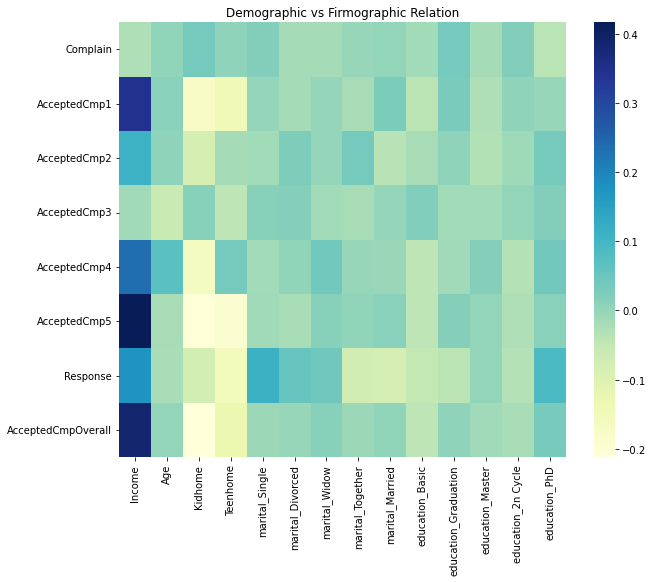

In [80]:
startx = correlation.columns.get_loc('Income')
endx = correlation.columns.get_loc('education_PhD') +1

starty = correlation.columns.get_loc('Complain')
endy = correlation.columns.get_loc('AcceptedCmpOverall') + 1

plt.figure(figsize=(10,8))
sns.heatmap(correlation.iloc[starty:endy, startx:endx], cmap="YlGnBu")
plt.title('Demographic vs Firmographic Relation')

##### Inferences

1. Campaign 1: Had quite a positive response from High income group but failed to attract Customers with Kids and Teens at home.
2. Campaign 2: Had a lower impact on Higher Income group compared to Campaign 1 but performed relatively well in other demographics.
3. Campaign 3: Had relatively bad performance compared to other Campaigns but surprisingly it had the best response from customers with Kids at home.
4. Campaign 4: Good response from higher income and age groups, best response from Customers with Teens at home but not liked by people with Kids at home.
5. Campaign 5: Focused essentially on the Higher income group. Failed miserable to attract customers with Kids and Teens.
6. Last Campaign: Higher income group has been moderately targeted. Also good response from Singles and PhDs.

**Notes:** As an Overall, we can see that the campigns were mostly targeted towards the higher income group. Customers with Kids and Teens were almost left out.

Another Interesting thing to note that the `Complain` is quite low and uniformly distributed among the demographics. Thus, the Complaint Redressal team has done quite a good job.

## Statistical Analysis

Let us make a dictionary to preserve the names of column for easier access.

In [81]:
cols = {c: i for i, c in enumerate(df.columns)}
cols

{'Income': 0,
 'Age': 1,
 'Kidhome': 2,
 'Teenhome': 3,
 'marital_Single': 4,
 'marital_Divorced': 5,
 'marital_Widow': 6,
 'marital_Together': 7,
 'marital_Married': 8,
 'education_Basic': 9,
 'education_Graduation': 10,
 'education_Master': 11,
 'education_2n Cycle': 12,
 'education_PhD': 13,
 'Complain': 14,
 'AcceptedCmp1': 15,
 'AcceptedCmp2': 16,
 'AcceptedCmp3': 17,
 'AcceptedCmp4': 18,
 'AcceptedCmp5': 19,
 'Response': 20,
 'AcceptedCmpOverall': 21,
 'MntWines': 22,
 'MntSweetProducts': 23,
 'MntFruits': 24,
 'MntMeatProducts': 25,
 'MntFishProducts': 26,
 'MntGoldProds': 27,
 'MntRegularProds': 28,
 'MntTotal': 29,
 'NumDealsPurchases': 30,
 'NumWebPurchases': 31,
 'NumCatalogPurchases': 32,
 'NumStorePurchases': 33,
 'NumWebVisitsMonth': 34,
 'Customer_Days': 35}

### Feature Engineering

Now it is time to change the data to categorical variables to both reduce the number of columns as well as make the data more interpretable.

Thus, for marriage status we can use:

| Category  | Meaning  |
|---|---|
| 0 | marital_Single |
| 1 | marital_Divorced |
| 2 | marital_Widow |
| 3 | marital_Together |
| 4 | marital_Married |
| 5 | NA |

If, some data is unclassified, we may replace them with the median.

In [84]:
cols = {c: i for i, c in enumerate(df.columns)}
start_index = cols['marital_Single']
end_index = cols['marital_Married'] + 1
relationship_Status = np.zeros((df.shape[0], 1))
for i in range(df.shape[0]):
    try:
        relationship_Status[i] = df.iloc[i, start_index:end_index].to_list().index(1)
    except ValueError:
        relationship_Status[i] = np.nan
df['relationship_Status'] = relationship_Status

In [85]:
df.isna().sum()

Income                  0
Age                     0
Kidhome                 0
Teenhome                0
marital_Single          0
marital_Divorced        0
marital_Widow           0
marital_Together        0
marital_Married         0
education_Basic         0
education_Graduation    0
education_Master        0
education_2n Cycle      0
education_PhD           0
Complain                0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
AcceptedCmpOverall      0
MntWines                0
MntSweetProducts        0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
MntRegularProds         0
MntTotal                0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Customer_Days           0
relationship_Status     0
dtype: int64

Same for Education:


| Category  | Meaning  |
|---|---|
| 0 | education_Basic |
| 1 | education_Graduation |
| 2 | education_Master |
| 3 | education_2n Cycle |
| 4 | education_PhD |
| NaN | Unclassified |

In [86]:
start_index = cols['education_Basic']
end_index = cols['education_PhD'] + 1
education_Level = np.zeros((df.shape[0], 1))

for i in range(df.shape[0]):
    val = df.iloc[i, start_index:end_index].sum() 
    try:
        education_Level[i] = df.iloc[i, start_index:end_index].to_list().index(1)
    except ValueError:
        education_Level[i] = np.nan
    
df['education_Level'] = education_Level
df.isna().sum()

Income                  0
Age                     0
Kidhome                 0
Teenhome                0
marital_Single          0
marital_Divorced        0
marital_Widow           0
marital_Together        0
marital_Married         0
education_Basic         0
education_Graduation    0
education_Master        0
education_2n Cycle      0
education_PhD           0
Complain                0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
AcceptedCmpOverall      0
MntWines                0
MntSweetProducts        0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
MntRegularProds         0
MntTotal                0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Customer_Days           0
relationship_Status     0
education_Level         0
dtype: int64

Remove Redundant rows

In [87]:
if 'education_2n Cycle' in df.columns:
    df.drop(columns =['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis = 1, inplace=True)
if 'marital_Divorced' in df.columns:
    df.drop(columns =['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'], axis = 1, inplace=True)

In [88]:
df.to_csv('./Data/re-data.csv', index=False)
del df

### How does our average Customer Look Like ?

In [89]:
df = pd.read_csv('./Data/re-data.csv')
cols = {c: i for i, c in enumerate(df.columns)}
customer = df.mean(axis=0).to_list()
custAge = customer[cols['Age']]
custIncome = customer[cols['Income']]
custRelation = customer[cols['relationship_Status']]
custEducation = customer[cols['education_Level']]
custProducts = customer[cols['MntWines']: cols['MntFishProducts']]
custResponse = customer[cols['AcceptedCmp1']: cols['Response']]
print('Age:\t\t{}\tIncome:\t\t{}'.format(custAge, custIncome))
print('Relation:\t{}\tEducation:\t{}'.format(custRelation, custEducation))
print('\nProducts Purchased:', custProducts, sep='\n')
print('\nCampaign Response:', custResponse, sep='\n')

Age:		51.09569160997732	Income:		51622.0947845805
Relation:	2.4952380952380953	Education:	1.9678004535147393

Products Purchased:
[306.16462585034014, 27.128344671201813, 26.4031746031746, 165.31201814058957]

Campaign Response:
[0.06439909297052154, 0.013605442176870748, 0.07392290249433106, 0.07437641723356009, 0.07301587301587302]


Hence, our average customer is a 51 years old person with a salary of $51622.09. He has a Master's degree and probably a widow/widower. He buys almost $562 worth of products with the highest expenditure on Wines ($306.16) followed by Meat Products ($165.31). He had no positive response to any of the campaigns organised and pays no interest to the Gold range of products. 

### Which is the primary source of Income?

In [114]:
X = df.loc[:,'NumDealsPurchases':'NumWebVisitsMonth']
Y = df.loc[:,'MntTotal']

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
rg = RandomForestRegressor(n_estimators=9, n_jobs=-1)
rg.fit(X_train, Y_train)

y_pred = rg.predict(X_test)

In [140]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root Mean Squared Error: 231.8614783463735


Total Expenditure is in the range of $1529/-. The RMS Error is only $231.86/- which is less than 18% of the range. This means that it is a reliable model.

#### Important Features



NumDealsPurchases      0.055401
NumWebPurchases        0.061930
NumCatalogPurchases    0.691123
NumStorePurchases      0.138345
NumWebVisitsMonth      0.053201
dtype: float64


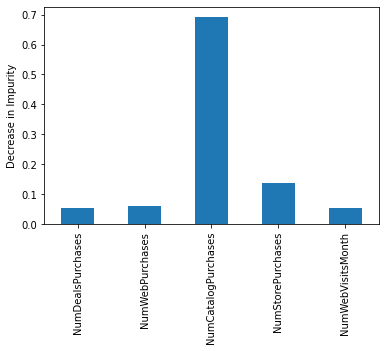

In [155]:
importances = rg.feature_importances_
forest_importances = pd.Series(importances, index=df.columns[cols['NumDealsPurchases']:cols['NumWebVisitsMonth']+1])
forest_importances.plot.bar()
plt.ylabel('Decrease in Impurity')
print(forest_importances)

#### SHAP Analysis

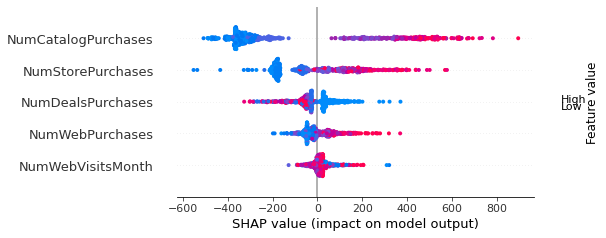

In [150]:
explainer = shap.TreeExplainer(rg)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values, X_test)

Hence, Catalog purchases is the primary source of Income for the company followed by Store and Web Purchases while, deals have a negative correlation with the Total Amount as expected.

### Which is the Primary Product?

Root Mean Squared Error: 43.5702856571936

MntWines            0.595428
MntSweetProducts    0.005509
MntFruits           0.004818
MntMeatProducts     0.385654
MntFishProducts     0.008592
dtype: float64


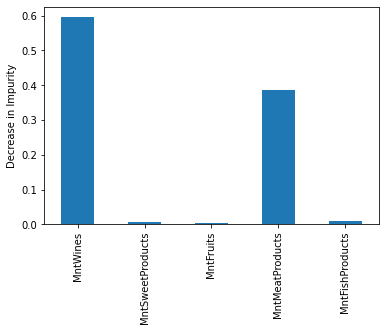

In [162]:
X = df.loc[:,'MntWines':'MntFishProducts']
Y = df.loc[:,'MntTotal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
rg_product = RandomForestRegressor(n_estimators=9, n_jobs=-1)
rg_product.fit(X_train, Y_train)

y_pred_product = rg_product.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_product)))
print()

importances_product = rg_product.feature_importances_
forest_importances_product = pd.Series(importances_product, index=df.columns[cols['MntWines']:cols['MntFishProducts']+1])
forest_importances_product.plot.bar()
plt.ylabel('Decrease in Impurity')
print(forest_importances_product)

Total Expenditure is in the range of $1529/-. The RMS Error is only $46.54/- which is less than 3.04% of the range. This means that it is a very reliable model.

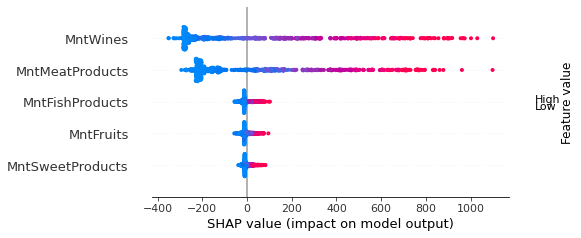

In [154]:
explainer_product = shap.TreeExplainer(rg_product)
shap_values_product = explainer_product.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values_product, X_test)

Wine followed by Meat Products are the most important reveneu generating items sold by the company. They constitute almost 59% and 39% of the total amount spent by the Customer.

Root Mean Squared Error: 13.27522303967803

MntGoldProds       0.004399
MntRegularProds    0.995601
dtype: float64


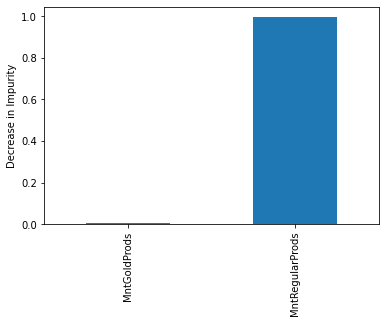

In [161]:
X = df.loc[:,'MntGoldProds':'MntRegularProds']
Y = df.loc[:,'MntTotal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
rg_product = RandomForestRegressor(n_estimators=9, n_jobs=-1)
rg_product.fit(X_train, Y_train)

y_pred_product = rg_product.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_product)))
print()

importances_product = rg_product.feature_importances_
forest_importances_product = pd.Series(importances_product, index=df.columns[cols['MntGoldProds']:cols['MntRegularProds']+1])
forest_importances_product.plot.bar()
plt.ylabel('Decrease in Impurity')
print(forest_importances_product)

It is interesting to see that Regular products generate 99% of the reveneu. An explanation to this is that the Gold standard products do not meet the price to the willingness to pay ratio. Either the quality of Gold Products must be improved or the prices must be slashed.